Stephanie Chiang  
DATA 605  
Fall 2025 
# Homework 2

In [ ]:
import math
import numpy as np

## Problem 1

1. (Bayesian): A new credit scoring system has been developed to predict the likelihood of loan defaults. The system has a 90% sensitivity, meaning that it correctly identifies 90% of those who will default on their loans. It also has a 95% specificity, meaning that it correctly identifies 95% of those who will not default. The default rate among borrowers is 2%. Given these prevalence, sensitivity, and specificity estimates, what is the probability that a borrower flagged by the system as likely to default will actually default? If the average loss per defaulted loan is $200,000 and the cost to run the credit scoring test on each borrower is $500, what is the total first-year cost for evaluating 10,000 borrowers?

The formula for Bayes Theorem is P(A|B) = (P(B|A) * P(A)) / P(B). Here, A is the event that a borrower will default and B is the event that the borrower is flagged as likely to default. To calculate the probability of A given B, we just need to calculate P(B), the overall probability of being flagged as likely to default, since the other values are already available.

So for the total probability, the formula is P(B) = P(B|A) * P(A) + P(B|not A) * P(not A). The values are plugged in below and result in a probabilty of about **0.2687** that the flagged borrower will actually default.

As for the total first year cost, we can just add together the costs of testing 10,000 borrowers and the expected losses from defaults. This results in a total first year cost of **$45,000,000.00**

In [96]:
sensitivity = 0.90      # P(B|A)
p_A = 0.02              # P(A)
specificity = 0.95      # P(not B|not A)

p_B = sensitivity * p_A + (1 - specificity) * (1 - p_A)

p_A_B = (sensitivity * p_A) / p_B
print(f"P(A|B) = {p_A_B}")

total_testing_cost = 10000 * 500
expected_defaults = 10000 * p_A
expected_loss = expected_defaults * 200000

print(f"Total first year cost = ${total_testing_cost + expected_loss}")

P(A|B) = 0.2686567164179103
Total first year cost = $45000000.0


2. (Binomial): The probability that a stock will pay a dividend in any given quarter is 0.7. What is the probability that the stock pays dividends exactly 6 times in 8 quarters? What is the probability that it pays dividends 6 or more times? What is the probability that it pays dividends fewer than 6 times? What is the expected number of dividend payments over 8 quarters? What is the standard deviation?

We can use the `binom.pmf()` function in `scipy` to calulate the probability mass function, which is the probability of obtaining exactly 6 successes in 8 quarters, given a probability of success 0.7 for each single quarter. This comes to about **0.2965**.

For the next two probabilities, we can use the cumulative distribution function `binom.cdf()`. We plug in 5 for probability of fewer than 6 successes, resulting in **0.4482**. Then we use that value and subtract that from 1 for the opposite, 6 or more successes, with comes to **0.5518**

The expected value is just the trials times the probability of success, or **5.6 payments**, and the standard deviation is calculated by multipling the trials with the probability of success with the probability of failure, then taking the square root. The standard deviation comes to **1.296**.

In [98]:
from scipy.stats import binom

n1_2 = 8       # number of quarters aka trials
p1_2 = 0.7     # probability of success per trial

print(f"P(X = 6) = {binom.pmf(6, n1_2, p1_2)}")

p_5less = binom.cdf(5, n1_2, p1_2)
print(f"P(X < 6) = {p_5less}")

p_min6 = 1 - p_5less
print(f"P(X ≥ 6) = {p_min6}")

print(f"Expected value = {n1_2 * p1_2}")

std_dev = math.sqrt(n1_2 * p1_2 * (1 - p1_2))
print(f"Standard deviation = {std_dev}")

P(X = 6) = 0.2964754800000001
P(X < 6) = 0.44822618999999997
P(X ≥ 6) = 0.55177381
Expected value = 5.6
Standard deviation = 1.2961481396815722


3. (Poisson): A financial analyst notices that there are an average of 12 trading days each month when a certain stock’s price increases by more than 2%. What is the probability that exactly 4 such days occur in a given month? What is the probability that more than 12 such days occur in a given month? How many such days would you expect in a 6-month period? What is the standard deviation of the number of such days? If an investment strategy requires at least 70 days of such price increases in a year for profitability, what is the percent utilization and what are your recommendations?

The `scipy` package also has functions for calculating the Poisson distribution.

- For the probability of observing exactly k events in a month, given a mean rate of occurrence, we can use `poisson.pmf()`. This comes to about 0.0053.
- For the probability of observing more than 12 events in a month, we can use the cumulative distribution function `poisson.cdf()` to calculate the probability of observing 12 or fewer events, then subtract that from 1. This comes to about 0.424.
- The expected number of events in a 6-month period is just the mean rate times the number of months, or 72.
- The standard deviation is the square root of the mean rate times the number of months, or about 8.4853.
- For the investment strategy, we can again use the cumulative distribution function to calculate the probability of observing at least 70 events in a year. This comes to about 0.9999. The expected utilization is the expected number of events in a year divided by the required number of events, or over 205%, so I would recommend this investment.

In [99]:
from scipy.stats import poisson

avg_events = 12

print(f"P(X = 4 in 1 month) = {poisson.pmf(4, avg_events)}")

print(f"P(X > 12 in 1 month) = {1 - poisson.cdf(12, avg_events)}")

expected_6 = avg_events * 6
print(f"Expected days in 6 months = {expected_6}")

std_6 = math.sqrt(expected_6)
print(f"Std. dev. for 6 months = {std_6}")

avg_year = avg_events * 12

p_min70 = 1 - poisson.cdf(69, avg_year)
print(f"P(≥70 in a year) = {p_min70}")

expected_utilization = (avg_year / 70) * 100
print(f"Expected utilization = {expected_utilization}%")


P(X = 4 in 1 month) = 0.005308599473275576
P(X > 12 in 1 month) = 0.4240347514269356
Expected days in 6 months = 72
Std. dev. for 6 months = 8.48528137423857
P(≥70 in a year) = 0.9999999999972864
Expected utilization = 205.7142857142857%


4. (Hypergeometric): A hedge fund has a portfolio of 25 stocks, with 15 categorized as high-risk and 10 as low-risk. The fund manager randomly selects 7 stocks to closely monitor. If the manager selected 5 high-risk stocks and 2 low-risk stocks, what is the probability of selecting exactly 5 high-risk stocks if the selection was random? How many high-risk and low-risk stocks would you expect to be selected?

Once again, we can use the `scipy` package; the `hypergeom.pmf()` function calculates the probability of selecting x, or exactly 5, high-risk stocks from a random draw of n = 7 stocks from a total of N = 25 stocks, 15 of which (the K or number of successes in the population) are high-risk. This comes to about **0.2811**.

The expected value formula is n * (K / N), which results in an expected value of **4.2 high-risk stocks** and **2.8 low-risk stocks**.

In [101]:
from scipy.stats import hypergeom

N_hg = 25   # total number of stocks
K_hg = 15   # number of high-risk stocks
n_hg = 7    # number of stocks selected
x_hg = 5    # number of high-risk selected

print(f"P(X = 5 high-risk) = {hypergeom.pmf(x_hg, N_hg, K_hg, n_hg)}")

expected_high = n_hg * (K_hg / N_hg)
print(f"Expected high-risk = {expected_high}")

expected_low = n_hg - expected_high
print(f"Expected low-risk  = {expected_low}")


P(X = 5 high-risk) = 0.2811212814645309
Expected high-risk = 4.2
Expected low-risk  = 2.8


5. (Geometric): The probability that a bond defaults in any given year is 0.5%. A portfolio manager holds this bond for 10 years. What is the probability that the bond will default during this period? What is the probability that it will default in the next 15 years? What is the expected number of years before the bond defaults? If the bond has already survived 10 years, what is the probability that it will default in the next 2 years?

The cumulative distribution function (CDF) for a geometric distribution is P(x <= n) = 1 - (1 - p)^n. p = 0.005 and n is the number of years.

The expected value of a geometric distribution is just 1/p.

As for the probability of defaulting after 10 years of survival, each year is independent so the calculation is the same but just for 2 year. 

In [102]:
p1_5 = 0.005  

print(f"P(default within 10 years) = {1 - ((1 - p1_5) ** 10)}")

print(f"P(default within 15 years) = {1 - ((1 - p1_5) ** 15)}")

print(f"Expected years before default = {1 / p1_5}")

print(f"P(default within 2 years) = {1 - ((1 - p1_5) ** 2)}")


P(default within 10 years) = 0.048889869534228136
P(default within 15 years) = 0.07243103118167216
Expected years before default = 200.0
P(default within 2 years) = 0.009974999999999956


6. (Poisson): A high-frequency trading algorithm experiences a system failure about once every 1500 trading hours. What is the probability that the algorithm will experience more than two failures in 1500 hours? What is the expected number of failures?

We can use `poisson.cdf()` to calculate the cumulative distribution function for 2 failures, then subtract that from 1 to get the complement. The expected number of failures is just the mean rate of occurrence, which is 1.

In [103]:
print(f"P(more than 2 fails) = {1 - poisson.cdf(2, 1)}")

P(more than 2 fails) = 0.08030139707139416


7. (Uniform Distribution): An investor is trying to time the market and is monitoring a stock that they believe has an equal chance of reaching a target price between 20 and 60 days. What is the probability that the stock will reach the target price in more than 40 days? If it hasn’t reached the target price by day 40, what is the probability that it will reach it in the next 10 days? What is the expected time for the stock to reach the target price?

We can use the `uniform.cdf` function where a is the minimum value (20 days) and b is the max value (60 days). We can calculate for x = 40 as the day we're interested in, then take the complement for over 40 days. This probability comes to **0.5**. 

Next, to get the probability of the stock reaching the price between days 40 and 50, we can divide P(X <= 50) - P(X <= 40) by the probability of being greater than 40.

The expected value of a uniform distribution is just the midpoint of the range, so (a + b)/2 = **40 days**.

In [104]:
from scipy.stats import uniform

a = 20
b = 60

p_40 = uniform.cdf(40, a, b - a)
print(f"P(X > 40) = {1 - p_40}")

p_40_50 = (uniform.cdf(50, a, b - a) - p_40) / (1 - p_40)
print(f"P(40 < X < 50) = {p_40_50}")

print(f"Expected days = {(a + b) / 2}")


P(X > 40) = 0.5
P(40 < X < 50) = 0.5
Expected days = 40.0


8. (Exponential Distribution): A financial model estimates that the lifetime of a successful start-up before it either goes public or fails follows an exponential distribution with an expected value of 8 years. What is the expected time until the start-up either goes public or fails? What is the standard deviation? What is the probability that the start-up will go public or fail after 6 years? Given that the start-up has survived for 6 years, what is the probability that it will go public or fail in the next 2 years?

The expected time AND the standard deviation for an exponential distribution are both just 1 / (the number of events per unit of time), or 1/8.

The probability of the start-up going public after 6 years is calculated with the formula P(T > t) = e^(−λt) where t = 6 and the lambda is the rate 1/8. This comes to **0.4723**.

The probability of the start-up failing in the 2 years is independent of the results from the previous years. So we use the same formula with t = 2 and take the complement.

In [107]:
rate1_8 = 1 / 8
print(f"E[T] = {1 / rate1_8} years")
print(f"Standard deviation = {1 / rate1_8} years")

print(f"P(T > 6) = {math.exp(-rate1_8 * 6)}")

print(f"P(6 < T <= 8) = {1 - math.exp(-rate1_8 * 2)}")


E[T] = 8.0 years
Standard deviation = 8.0 years
P(T > 6) = 0.4723665527410147
P(6 < T <= 8) = 0.22119921692859512


## Problem 2

1. (Product Selection): A company produces 5 different types of green pens and 7 different types of red pens. The marketing team needs to create a new promotional package that includes 5 pens. How many different ways can the package be created if it contains fewer than 2 green pens?

**Answer:**

We are calculating for 2 situations: sets containing either 0 green pens or 1 green pen. Using the `comb` function, we can plug in for the first condition that all 5 come from the 7 red pens. Then for the second condition, we can plug in for combos in which 1 pen comes from the 5 greens and 4 are from the 7 red. These are multiplied because the order doesn't matter so we want all of those cases, then added to the number of combos from the first condition, for a total of **196**.

In [76]:
math.comb(7, 5) + (math.comb(5, 1) * math.comb(7, 4))

196

2. (Team Formation for a Project): A project committee is being formed within a company that includes 14 senior managers and 13 junior managers. How many ways can a project team of 5 members be formed if at least 4 of the members must be junior managers?

**Answer:**

Same as above, we are adding the combinations that include 4 juniors + 1 senior with those of only 5 juniors. This comes to **11,297** combinations.

In [49]:
(math.comb(13, 4) * math.comb(14, 1)) + math.comb(13, 5)

11297

3. (Marketing Campaign Outcomes): A marketing campaign involves three stages: first, a customer is sent 5 email offers; second, the customer is targeted with 2 different online ads; and third, the customer is presented with 3 personalized product recommendations. If the email offers, online ads, and product recommendations are selected randomly, how many different possible outcomes are there for the entire campaign?

**Answer:**

Since each stage is random and independent, 5 emails x 2 ads x 3 recommendations is simply 5 * 2 * 3 = **30** different outcomes.

4. (Product Defect Probability): A quality control team draws 3 products from a batch of size N without replacement. What is the probability that at least one of the products drawn is defective if the defect rate is known to be consistent? 

**Answer:**

If our defect rate is p, we can get the probability that all are non-defective (the rate of non-defects divided by all the possible combinations of 3), and take the complement:

`1 - (math.comb((1 - p) * N, 3) / math.comb(N, 3))`

5. (Business Strategy Choices): A business strategist is choosing potential projects to invest in, focusing on 17 high-risk, high-reward projects and 14 low-risk, steady-return projects.

**Step 1:** How many different combinations of 5 projects can the strategist select?

**Answer:**

For n choose k, where n is the total number of items and k is the size of the set chosen, the formula is: n! / (k!(n - k)!).

And 31! / (5!(31 - 5)!) reduces to (31 x 30 x 29 x 28 x 27) / (5 x 4 x 3 x 2 x 1) = **169,911**

Or just `math.comb(31, 5)` = **169911**


**Step 2:** How many different combinations of 5 projects can the strategist select if they want at least one low-risk project?

**Answer:**

At least one low-risk project means that all 5 are high risk. So we can just subtract those combinations from the above total. 

`math.comb(17, 5)` = 6188, so 169911 - 6188 = **163,723**

6. (Event Scheduling): A business conference needs to schedule 9 different keynote sessions from three different industries: technology, finance, and healthcare. There are 4 potential technology sessions, 104 finance sessions, and 17 healthcare sessions to choose from. How many different schedules can be made? Express your answer in scientific notation rounding to the hundredths place.

**Answer:**

To schedule 9 keynotes with 125 total sessions, using the same formula as above, 125! / (9!(125 - 9)!), which comes to **1.53 * 10^13** below.

In [55]:
print(f"{math.comb(125, 9):.2e}")

1.53e+13


7. (Book Selection for Corporate Training): An HR manager needs to create a reading list for a corporate leadership training program, which includes 13 books in total. The books are categorized into 6 novels, 6 business case studies, 7 leadership theory books, and 5 strategy books.

**Step 1:** If the manager wants to include no more than 4 strategy books, how many different reading schedules are possible? Express your answer in scientific notation rounding to the hundredths place.

**Answer:**

For a list of 13, we can multiply the different possible ways of choosing up to 4 strategy books (using k = 0, 1, 2, 3 or 4 out of the 5) with the the different ways of choosing any of the other books (13 - k out of the 19 other books). The below returns **2.42 × 10^6**.


**Step 2:** If the manager wants to include all 6 business case studies, how many different reading schedules are possible? Express your answer in scientific notation rounding to the hundredths place.

**Answer:**

If all 6 business case studies must be included, then we are only counting the combinations of remaining 7 books made up of the 6 + 7 + 5 other books. Using `math.comb` this comes to **3.18 * 10^4**.

In [57]:
strat = 0
for k in range(5):
    strat += math.comb(5, k) * math.comb(19, 13 - k)

print(f"{strat:.2e}")

print(f"{math.comb(18,7):.2e}")

2.42e+06
3.18e+04


8. (Product Arrangement): A retailer is arranging 10 products on a display shelf. There are 5 different electronic gadgets and 5 different accessories. What is the probability that all the gadgets are placed together and all the accessories are placed together on the shelf? Express your answer as a fraction or a decimal number rounded to four decimal places.

**Answer:**

The total number of arrangements is 10! = 3628800.

Gadgets can be arranged among themselves 5! = 120 ways.

The accessories can also be arrange amongst themselves 120 ways.

The number of ways to arrange the 2 groupings is 2! = 2.

(2 * 120 * 120) / 3628800 = **28800/3628800 or 0.0079**

9. (Expected Value of a Business Deal): A company is evaluating a deal where they either gain $4 for every successful contract or lose $16 for every unsuccessful contract. A "successful" contract is defined as drawing a queen or lower from a standard deck of cards. (Aces are considered the highest card in the deck.)

**Step 1:** Find the expected value of the deal. Round your answer to two decimal places. Losses must be expressed as negative values.

**Answer:**

The expected value is the sum of each possible outcome times its probability. Here it's E[X] = (gain × P(success)) + (loss × P(failure)).

The probability of failure is drawing a king or ace out of a deck, 8 / 52. The probability of success is drawing a 2 through a queen, or the remaining 44 / 52.

4*(44/52) + (-16)*(8/52) = **0.92** 


**Step 2:** If the company enters into this deal 833 times, how much would they expect to win or lose? Round your answer to two decimal places. Losses must be expressed as negative values.

**Answer:**

The expected value per deal of 0.92 * 833 = **766.36**

## Problem 3

1. (Supply Chain Risk Assessment): Let X1, X2, ..., Xn represent the lead times (in days) for the delivery of key components from n = 5 different suppliers. Each lead time is uniformly distributed across a range of 1 to k = 20 days, reflecting the uncertainty in delivery times. Let Y denote the minimum delivery time among all suppliers. Understanding the distribution of Y is crucial for assessing the earliest possible time you can begin production. Determine the distribution of Y to better manage your supply chain and minimize downtime.

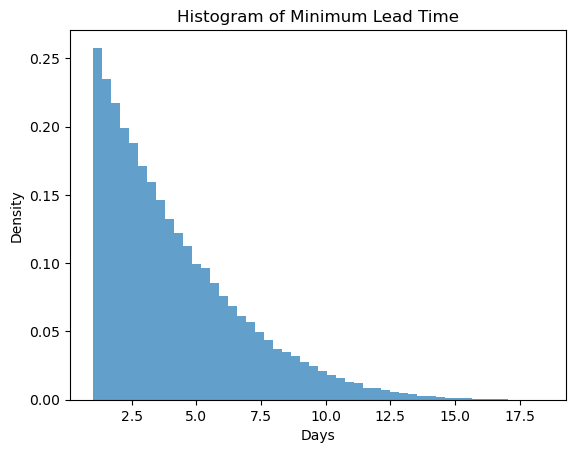

In [77]:
n = 5
trials = 100000
samples = np.random.uniform(1, 20, size=(trials, n))
Y = np.min(samples, axis=1)

import matplotlib.pyplot as plt
plt.hist(Y, bins=50, density=True, alpha=0.7)
plt.title("Histogram of Minimum Lead Time")
plt.xlabel("Days")
plt.ylabel("Density")
plt.show()


2. (Maintenance Planning for Critical Equipment): Your organization owns a critical piece of equipment, such as a high-capacity photocopier (for a law firm) or an MRI machine (for a healthcare provider). The manufacturer estimates the expected lifetime of this equipment to be 8 years, meaning that, on average, you expect one failure every 8 years. It's essential to understand the likelihood of failure over time to plan for maintenance and replacements.

a. Geometric Model: Calculate the probability that the machine will not fail for the first 6 years. Also, provide the expected value and standard deviation. This model assumes each year the machine either fails or does not, independently of previous years.

If the events are independent, the prob of failure in a year is 1/8 and the prob of success in a year is 7/8 or 0.875. 

- The probability of no failure in the first 6 years is 0.875^6 or about **0.45**.
- The expected number of years until the first failure is just **8 years**.
- And the standard deviation is the square root of the rate of success 0.875 divided by the p^2, or **7.48**.

In [108]:
math.sqrt((0.875/0.125**2))

7.483314773547883

b. Exponential Model: Calculate the probability that the machine will not fail for the first 6 years. Provide the expected value and standard deviation, modeling the time to failure as a continuous process.

The expected time AND the standard deviation for an exponential distribution are both just 1 / the number of events per unit of time or 1/8. This is just **8 years**.

The probability of the machine not failing for the first 6 years is calculated with the formula P(T > t) = e^(−λt) where t = 6 and the lambda is the rate 1/8. This comes to **0.4724**.

In [109]:
rate_3b = 1 / 8
print(f"E[T] = {1 / rate_3b} years")
print(f"Standard deviation = {1 / rate_3b} years")

p_over6 = math.exp(-rate_3b * 6)
print(f"P(T > 6) = {p_over6}")

E[T] = 8.0 years
Standard deviation = 8.0 years
P(T > 6) = 0.4723665527410147


c. Binomial Model: Calculate the probability that the machine will not fail during the first 6 years, given that it is expected to fail once every 8 years. Provide the expected value and standard deviation, assuming a fixed number of trials (years) with a constant failure probability each year.

We can interpret this as the probability of 0 failures out of 6 trials (years), with a rate of failure of about 0.125 per year. This comes out to **0.4488**. The expected number of failures is the trials times the rate, or **0.75 failures**. And the standard deviation is the square root of the trials times the rate of failure times the rate of success, or **0.81**.

In [110]:
print(f"P(X = 0 failures) = {binom.pmf(0, 6, 0.125)}")
print(f"E[failures] = {6 * 0.125} years")
print(f"Std. dev. = {math.sqrt(6 * 0.125 * (1 - 0.125))}")

P(X = 0 failures) = 0.4487953186035156
E[failures] = 0.75 years
Std. dev. = 0.8100925873009825


d. Poisson Model: Calculate the probability that the machine will not fail during the first 6 years, modeling the failure events as a Poisson process. Provide the expected value and standard deviation.

The poisson model calculates the probability of 0 failures given the rate of failure over years, which is also our expected value, 6 * 1/8 = **0.75**. This comes to about **0.4724**. The standard deviation is the square root of the expected value, or **0.87**.

In [111]:
rate_3d = 6 * 1/8
print(f"P(X = 0 failures) = {poisson.pmf(0, rate_3d)}")
print(f"E[failures] = {rate_3d} years")
print(f"Std. dev. = {math.sqrt(0.75)}")

P(X = 0 failures) = 0.4723665527410147
E[failures] = 0.75 years
Std. dev. = 0.8660254037844386


## Problem 4

1.  Scenario: You are managing two independent servers in a data center. The time until the next failure for each server follows an exponential distribution with different rates:

Server A has a failure rate of λA = 0.5 failures per hour.
Server B has a failure rate of λB = 0.3 failures per hour.

Question: What is the distribution of the total time until both servers have failed at least once? Use the moment generating function (MGF) to find the distribution of the sum of the times to failure.

2. Sum of Independent Normally Distributed Random Variables

Scenario: An investment firm is analyzing the returns of two independent assets, Asset X and Asset Y. The returns on these assets are normally distributed:

Asset X: X ~ N(μX = 5%, σ^2 X = 4%)
Asset Y: Y ~ N(μY = 7%, σ^2 Y = 9%)

Question: Find the distribution of the combined return of the portfolio consisting of these two assets using the moment generating function (MGF).

3.  Scenario: A call center receives calls independently from two different regions. The number of calls received from Region A and Region B in an hour follows a Poisson distribution:

Region A: λA ~ Poisson(λA = 3)
Region B: λB ~ Poisson(λB = 5)

Question: Determine the distribution of the total number of calls received in an hour from both regions using the moment generating function (MGF).

## Problem 5

1.  Customer Retention and Churn Analysis

Scenario: A telecommunications company wants to model the behavior of its customers regarding their likelihood to stay with the company (retention) or leave for a competitor (churn). The company segments its customers into three states:

State 1: Active customers who are satisfied and likely to stay (Retention state).
State 2: Customers who are considering leaving (At-risk state).
State 3: Customers who have left (Churn state).
The company has historical data showing the following monthly transition probabilities:

From State 1 (Retention): 80% stay in State 1, 15% move to State 2, and 5% move to State 3.
From State 2 (At-risk): 30% return to State 1, 50% stay in State 2, and 20% move to State 3.
From State 3 (Churn): 100% stay in State 3.
The company wants to analyze the long-term behavior of its customer base.

Question: (a) Construct the transition matrix for this Markov Chain. (b) If a customer starts as satisfied (State 1), what is the probability that they will eventually churn (move to State 3)? (c) Determine the steady-state distribution of this Markov Chain. What percentage of customers can the company expect to be in each state in the long run?

2: Inventory Management in a Warehouse
Scenario: A warehouse tracks the inventory levels of a particular product using a Markov Chain model. The inventory levels are categorized into three states:

State 1: High inventory (More than 100 units in stock).
State 2: Medium inventory (Between 50 and 100 units in stock).
State 3: Low inventory (Less than 50 units in stock).
The warehouse has the following transition probabilities for inventory levels from one month to the next:

From State 1 (High): 70% stay in State 1, 25% move to State 2, and 5% move to State 3.
From State 2 (Medium): 20% move to State 1, 50% stay in State 2, and 30% move to State 3.
From State 3 (Low): 10% move to State 1, 40% move to State 2, and 50% stay in State 3.
The warehouse management wants to optimize its restocking strategy by understanding the long-term distribution of inventory levels.

Question: (a) Construct the transition matrix for this Markov Chain. (b) If the warehouse starts with a high inventory level (State 1), what is the probability that it will eventually end up in a low inventory level (State 3)? (c) Determine the steady-state distribution of this Markov Chain. What is the long-term expected proportion of time that the warehouse will spend in each inventory state?
